In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("df_final.csv")

In [3]:
df.head()

,DATE,all_Const_Emp,emratio,GDP,home_ow_rate,house_st,income,IPI_Cement,labor_percent,monthly_supply,...,new_private_house,new_private_hw_under,permit,POP,PPI_Cement,PPI_Concrete,p_saving_rate,target,total_emp_cons,unemployed_rate
0,2003-07-01,0.0,0.0,11566.669,68.4,0.0,0.0,0.000,0.0,0.0,...,-0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0
1,2003-08-01,840.2,62.1,11566.669,68.4,1833.0,9538.8,152.498,66.1,0.0,...,1.39134,0.0,1966.0,291072.0,0.0,5.046002,0.0,135.966,6760.0,0.0
2,2003-08-08,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,-0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0
3,2003-08-15,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,-0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0
4,2003-08-22,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,...,-0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0


In [4]:
# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

In [5]:
X = df.drop(columns=['DATE', 'target'], axis=1)
y = df.target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
lasso_cv_model = LassoCV(alphas=np.logspace(-4, 4, 100),cv=5, max_iter=5000)

lasso_cv_model.fit(X_train, y_train)

lasso_cv_predictions = lasso_cv_model.predict(X_test)

In [9]:
optimal_alpha = lasso_cv_model.alpha_

mse = mean_squared_error(y_test, lasso_cv_predictions)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, lasso_cv_predictions)

print(f"Optimal Alpha: {optimal_alpha:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"RMSE: {rmse:2f}")
print(f"R-squared (R2): {r2:.2f}")

Optimal Alpha: 0.0087
Mean Squared Error (MSE): 10.95
RMSE: 3.309357
R-squared (R2): 1.00


In [10]:
cross_val_scores = cross_val_score(lasso_cv_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R-squared Scores:")
print(cross_val_scores)

Cross-Validation R-squared Scores:
[0.99897933 0.99683955 0.99831674 0.99895948 0.99514924]


In [11]:
mean_r2 = cross_val_scores.mean()
std_r2 = cross_val_scores.std()

print(f"Mean R-squared: {mean_r2:.4f}")
print(f"Standard Deviation of R-squared: {std_r2:.4f}")

Mean R-squared: 0.9976
Standard Deviation of R-squared: 0.0015


In [12]:
print(0.1 * rmse)
print(0.1 * df['target'].mean()) # rmse should be less than the 10% of mean of target variable

0.3309356735070352
3.5804912210694333


In [13]:
# coefficients and corresponding feature names
lasso_coefficients = lasso_cv_model.coef_
feature_names = X.columns

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefficients})

non_zero_coefficients_df = coefficients_df[coefficients_df['Coefficient'] != 0]
zero_coefficients_df = coefficients_df[coefficients_df['Coefficient'] == 0]

In [14]:
non_zero_coefficients_df

,Feature,Coefficient
0,all_Const_Emp,100.313035
2,GDP,-4.686693
3,home_ow_rate,-14.685082
5,income,30.703586
6,IPI_Cement,-24.337988
7,labor_percent,13.979207
9,mortgage_rate,-0.117384
10,MSPUS,25.614872
13,permit,-2.573047
14,POP,-1.265576


In [15]:
zero_coefficients_df

,Feature,Coefficient
1,emratio,-0.0
4,house_st,-0.0
8,monthly_supply,0.0
11,new_private_house,0.0
12,new_private_hw_under,0.0
16,PPI_Concrete,0.0
17,p_saving_rate,0.0
19,unemployed_rate,0.0


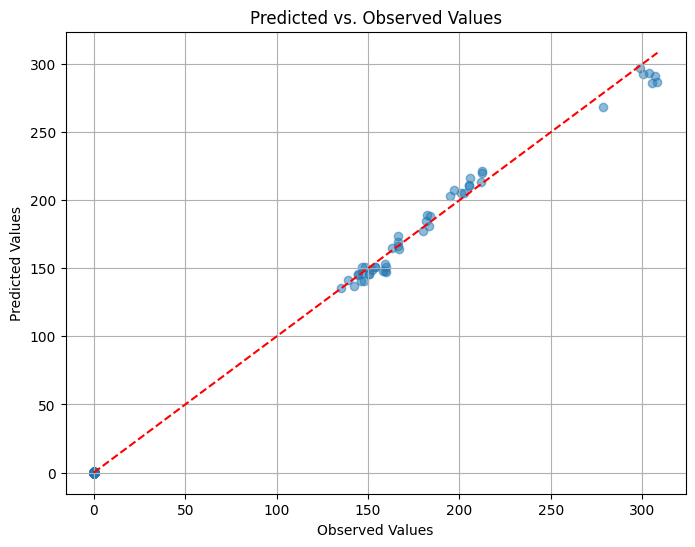

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_cv_predictions, alpha=0.5)
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Observed Values")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()